# Imports Necessários

In [1]:
# Imports para Deep Learning (Keras/TensorFlow)
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam # Otimizador

# Imports para manipulação de dados e álgebra (Tensores/Arrays)
import numpy as np

# Imports para visualização (opcional, mas útil)
import matplotlib.pyplot as plt

# Garante que o TensorFlow esteja funcionando
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.19.0


# Carregando e Pré-processando o Dataset CIFAR-10

In [2]:
# --- 1. Carga dos Dados ---
# O dataset CIFAR-10 já vem dividido em treino e teste no Keras
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# --- 2. Pré-processamento e Normalização (Transformação de Tensores) ---

# Imagens são tensores de pixels [0 a 255].
# Normalizar (dividir por 255) transforma os tensores para o range [0-1].
# Isso é crucial para otimizar o processo de treinamento (Gradiente Descendente).
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print(f"Formato dos Tensores de Treino (Imagens): {X_train.shape}")
print(f"Formato dos Tensores de Teste (Imagens): {X_test.shape}")
print(f"Valores de Pixel após Normalização (exemplo): {X_train[0][0][0]}")

# --- 3. One-Hot Encoding (Representação Vetorial das Classes) ---

# Converter rótulos de classe (e.g., o número 5) para vetores binários.
# Isso é necessário para a função de custo (loss function) da CNN.
num_classes = 10
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

print(f"Formato dos Tensores de Rótulos (codificados): {y_train_encoded.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Formato dos Tensores de Treino (Imagens): (50000, 32, 32, 3)
Formato dos Tensores de Teste (Imagens): (10000, 32, 32, 3)
Valores de Pixel após Normalização (exemplo): [0.23137255 0.24313726 0.24705882]
Formato dos Tensores de Rótulos (codificados): (50000, 10)


# Definição da Arquitetura da CNN

In [3]:
# Definindo as dimensões de entrada (32x32 pixels, 3 canais de cor RGB)
input_shape = X_train.shape[1:]
num_classes = 10

# Criação do Modelo Sequencial
model = Sequential()

# --- Bloco 1: Extração Inicial de Features (Matrizes de Filtros) ---

# Camada Conv2D 1: O filtro (kernel) é uma matriz 3x3 que desliza sobre o tensor de entrada (imagem).
# Ele realiza uma multiplicação e soma (Convolução), que é uma transformação linear.
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))

# Camada Conv2D 2: Aprofundamento da extração de features.
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

# Camada MaxPooling 1: Redução de Dimensionalidade (Subamostragem).
# Reduz o tamanho da matriz de features pela metade (e.g., de 32x32 para 16x16),
# demonstrando uma aplicação de redução de dimensionalidade em tensores.
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # Dropout: Ajuda a prevenir overfitting

# --- Bloco 2: Extração de Features Mais Complexas ---

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# --- Camadas Densas (O Classificador Final) ---

# Flatten: Transforma o tensor 3D de features em um vetor 1D.
model.add(Flatten())

# Camada Densa 1: Classificação. É uma operação tradicional de Álgebra Linear (Multiplicação Matriz-Vetor).
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Camada de Saída: O vetor de 10 elementos (probabilidades para cada classe).
model.add(Dense(num_classes, activation='softmax'))

# --- Compilação do Modelo ---

# A função de perda (Loss) e o Otimizador (Optimizer) dependem diretamente
# do Cálculo Multivariado e Álgebra Linear (cálculo de Gradientes para Backpropagation).
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Exibição da arquitetura e dos parâmetros (pesos das matrizes)
print("--- Resumo da Arquitetura da CNN ---")
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


--- Resumo da Arquitetura da CNN ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

# Treinamento e Avaliação Inicial do Modelo (Otimização do Gradiente)

In [4]:
# --- Parâmetros de Treinamento ---
# epochs: Número de vezes que o modelo verá todo o conjunto de treino.
# batch_size: Número de imagens processadas simultaneamente em cada passo do Gradiente Descendente.
epochs = 50 # Geralmente, mais epochs resultam em melhor performance, mas levam mais tempo.
batch_size = 64

print(f"Iniciando o treinamento da CNN com {epochs} épocas...")

# O treinamento ajusta os pesos (matrizes de filtros/conexões) do modelo para minimizar a função de perda (loss).
history = model.fit(
    X_train, y_train_encoded,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test_encoded),
    shuffle=True, # Embaralhar os dados de treino ajuda na generalização
    verbose=1
)

print("\nTreinamento concluído.")

# --- Avaliação Final no Conjunto de Teste ---
print("\nAvaliação Final no Conjunto de Teste:")
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"Loss Final (Erro): {loss:.4f}")
print(f"Acurácia Final: {accuracy*100:.2f}%")

Iniciando o treinamento da CNN com 50 épocas...
Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 300s 380ms/step - accuracy: 0.2557 - loss: 2.0149 - val_accuracy: 0.4608 - val_loss: 1.5042
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 320s 377ms/step - accuracy: 0.4476 - loss: 1.5269 - val_accuracy: 0.5267 - val_loss: 1.3352
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 308s 393ms/step - accuracy: 0.5035 - loss: 1.3757 - val_accuracy: 0.5664 - val_loss: 1.2236
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 294s 376ms/step - accuracy: 0.5528 - loss: 1.2720 - val_accuracy: 0.5945 - val_loss: 1.1500
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 333s 390ms/step - accuracy: 0.5823 - loss: 1.1817 - val_accuracy: 0.6139 - val_loss: 1.0849
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 320s 388ms/step - accuracy: 0.6040 - loss: 1.1190 - val_accuracy: 0.6390 - val_loss: 1.0287
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 324s 390ms/step - accuracy: 0.6199 - loss: 1.0645 - val_accuracy: 0.6603 - val_loss: 0.9795
Epoch 8/50
782/782 ━━━━━━━━━

# Visualização da Convergência e Acurácia

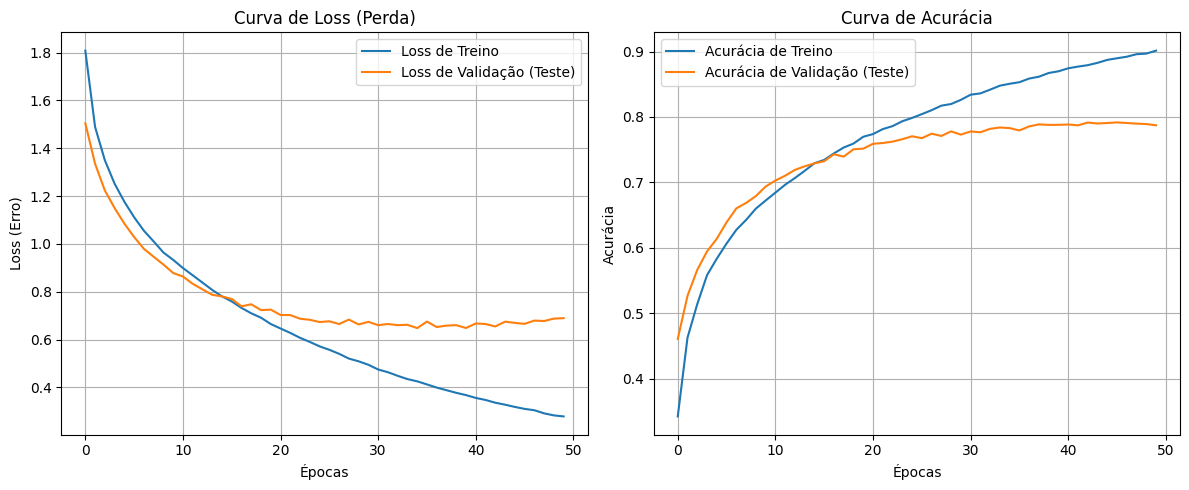


--- Resumo Final do Modelo ---
Acurácia Final de Validação: 78.73%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step

Exemplo de Previsão na primeira imagem do Teste:
Classe Real: gato
Classe Prevista: gato (Probabilidade: 98.05%)


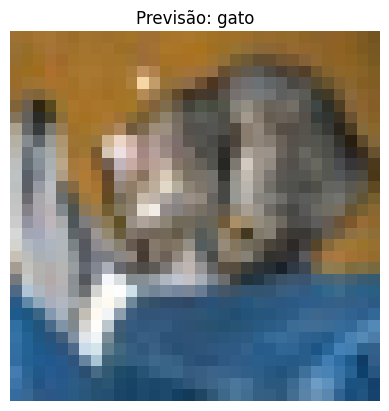

In [5]:
# --- Visualização da Convergência ---

# 1. Gráfico de Perda (Loss)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss de Treino')
plt.plot(history.history['val_loss'], label='Loss de Validação (Teste)')
plt.title('Curva de Loss (Perda)')
plt.xlabel('Épocas')
plt.ylabel('Loss (Erro)')
plt.legend()
plt.grid(True)

# 2. Gráfico de Acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação (Teste)')
plt.title('Curva de Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Interpretação dos Resultados ---
final_accuracy = history.history['val_accuracy'][-1]
print(f"\n--- Resumo Final do Modelo ---")
print(f"Acurácia Final de Validação: {final_accuracy*100:.2f}%")

# Definição das classes CIFAR-10 para interpretação
class_names = ['avião', 'automóvel', 'pássaro', 'gato', 'cervo',
               'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão']

# Exemplo de previsão: Pegar a primeira imagem do conjunto de teste
sample_image = X_test[0:1]
prediction_probabilities = model.predict(sample_image)
predicted_class_index = np.argmax(prediction_probabilities)
true_class_index = np.argmax(y_test_encoded[0]) # y_test_encoded é a versão one-hot

print(f"\nExemplo de Previsão na primeira imagem do Teste:")
print(f"Classe Real: {class_names[true_class_index]}")
print(f"Classe Prevista: {class_names[predicted_class_index]} (Probabilidade: {prediction_probabilities[0][predicted_class_index]*100:.2f}%)")

# Opcional: Mostrar a imagem
plt.figure()
plt.imshow(X_test[0])
plt.title(f"Previsão: {class_names[predicted_class_index]}")
plt.axis('off')
plt.show()

# Insights e Análise dos Resultados

Com base no treinamento da Convolutional Neural Network (CNN) no dataset CIFAR-10 por 50 épocas, podemos extrair os seguintes insights:

## Desempenho Geral do Modelo

*   **Acurácia Final de Validação:** O modelo atingiu uma acurácia final de validação de **78.73%**. Isso significa que, no conjunto de dados que o modelo não viu durante o treinamento, ele classificou corretamente aproximadamente 78.73% das imagens.
*   **Loss Final (Erro):** A perda final no conjunto de validação foi de **0.6896**. A função de perda mede o quão bem o modelo está performando; um valor menor indica um melhor desempenho.

## Análise das Curvas de Treinamento e Validação

Observando os gráficos de Loss e Acurácia:

*   **Curva de Loss:** A perda de treino diminuiu consistentemente ao longo das épocas, indicando que o modelo está aprendendo e ajustando seus pesos para minimizar o erro nos dados de treino. A perda de validação também diminuiu inicialmente, mas começou a se estabilizar ou até aumentar ligeiramente nas épocas finais. Isso pode indicar um leve overfitting, onde o modelo está se tornando muito especializado nos dados de treino e perdendo a capacidade de generalizar para dados novos.
*   **Curva de Acurácia:** A acurácia de treino aumentou continuamente, enquanto a acurácia de validação aumentou e depois se estabilizou ou teve pequenas oscilações. A diferença entre a acurácia de treino e validação nas épocas finais também sugere um possível overfitting.

## Exemplo de Previsão

O exemplo de previsão na primeira imagem de teste (`gato`) demonstrou uma classificação correta com alta probabilidade (98.05%). Este é apenas um exemplo, e o desempenho geral é refletido na acurácia média no conjunto de teste.

## Considerações Finais

A acurácia de 78.73% é um bom ponto de partida para a classificação de imagens no CIFAR-10 com esta arquitetura de CNN. Para potencialmente melhorar o desempenho e mitigar o overfitting, futuras etapas poderiam incluir:

*   **Aumento de Dados (Data Augmentation):** Aplicar transformações nas imagens de treino (rotação, zoom, etc.) para criar mais exemplos e tornar o modelo mais robusto.
*   **Ajuste de Hiperparâmetros:** Experimentar diferentes taxas de aprendizado, tamanhos de batch, número de filtros nas camadas convolucionais, etc.
*   **Regularização Adicional:** Adicionar mais técnicas de regularização, como L1/L2, ou ajustar as taxas de dropout.
*   **Arquiteturas Mais Complexas:** Explorar modelos de CNNs mais profundas ou com diferentes tipos de camadas.

Este modelo fornece uma base sólida para futuras experimentações e otimizações.